In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
import seaborn as sns
sns.set()

In [3]:
#menentukan rataan 2 kelompok
# grup 1 = tanpa pupuk
# grup 2 = dengan pupuk
rataan1 = 50
rataan2 = 51

# standar deviasi (variasi) -- sama untuk 2 kelompok
sd = 5

# ukuran sample dua kelompok
sample1 = 50
sample2 = 40


In [4]:
# Generate bilangan random
test = np.random.randn(sample1)

In [5]:
test

array([ 0.54696196,  0.37583643, -2.65782085,  0.41245504, -0.18366391,
       -0.68565343,  0.35858259, -0.94158033, -0.12166666, -2.14389771,
       -2.14911096,  1.39092208,  0.82234512,  0.16629617,  0.3490556 ,
       -1.69061079,  0.63836335, -0.75737275, -1.16636036,  0.21765906,
        0.17577637, -0.07703693,  0.19203287, -1.65998789,  2.22197702,
        0.59808316,  0.49775125,  0.27184872,  0.37202366,  0.68948047,
        0.639539  , -0.16729352,  0.69233071,  0.53490024, -1.49725095,
       -1.77828677,  0.49216607, -2.23190616, -1.34585375,  1.86562813,
       -0.8105724 ,  1.07615312,  0.50268138,  1.08962453, -0.3629895 ,
       -0.44324333,  1.34394341,  0.96964801,  1.71996469,  1.42908989])

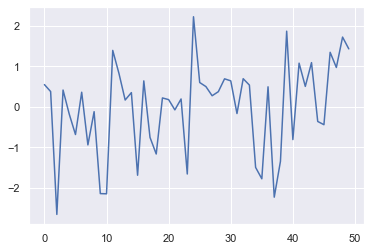

In [6]:
plt.plot(test)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

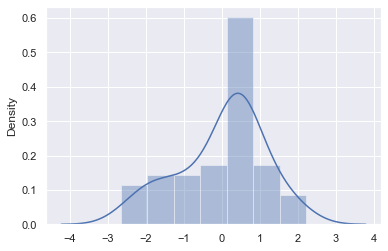

In [7]:
sns.distplot(test)

In [8]:
# Generate data
data1 = np.random.randn(sample1) * sd + rataan1
data2 = np.random.randn(sample2) * sd + rataan2

# menggabungkan sample size (jumlah data)
kelompok_data = [sample1, sample2]

batas = [np.min(np.hstack((data1, data2))), np.max(np.hstack((data1, data2)))]

In [9]:
batas

[33.40177116906108, 64.55037369275901]

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


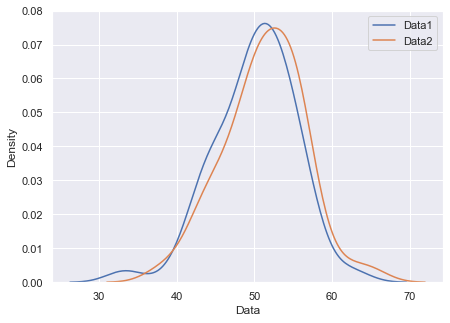

In [10]:
# plot distribusi kedua kelompok (stastitik deskriptif)
plt.figure(figsize=(7,5))

a = sns.distplot(data1, hist=False, label='Data1')
a = sns.distplot(data2, hist=False, label='Data2')

a.set(xlabel='Data', ylabel='Density')
plt.legend()
plt.show()

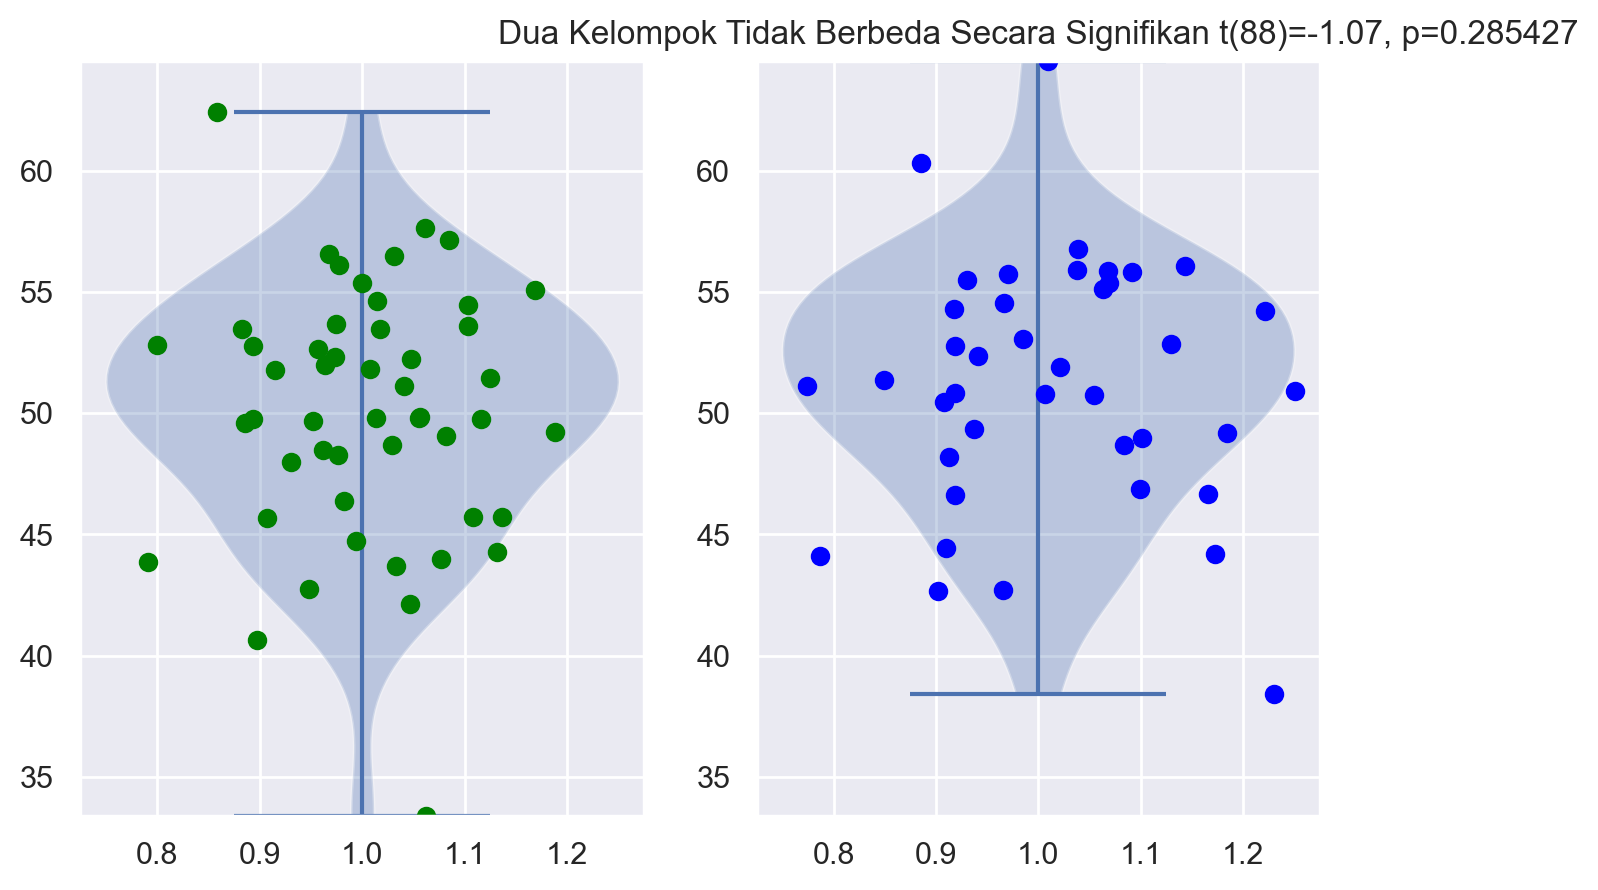

In [11]:
# melakukan uji statistik (statistik inferential)
fig , ax = plt.subplots(1,2, figsize = (8, 5), dpi = 200)

ax[0].violinplot(data1)
ax[0].plot(1 + np.random.randn(sample1)/10, data1, 'o', color = 'green')
ax[0].set_ylim(batas)

ax[1].violinplot(data2)
ax[1].plot(1 + np.random.randn(sample2)/10, data2, 'o', color = 'blue')
ax[1].set_ylim(batas)

# melakukan uji t-test
t, p = stats.ttest_ind(data1, data2)

# mencetak hasil ttest di judul
sigtxt = ('', ' Tidak')
plt.title('Dua Kelompok{} Berbeda Secara Signifikan t({})={}, p={}'.format(sigtxt[int(p>.05)], sum(kelompok_data) - 2, np.round(t,2), np.round(p,6)))
plt.show()

In [12]:
p

0.2854273629233661